In [2]:
%matplotlib inline

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt

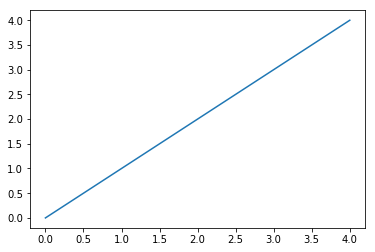

In [5]:
plot(arange(5))
#side note: cumsum is a type of cumulative sum over time chart

In [6]:
df = pd.read_csv("C:/Users/Karthik/Desktop/Coursera/Ex_Files_RStats_EssT/Exercise Files/analytics vidhya/loan prediction/train.csv")
df2 = pd.read_csv("C:/Users/Karthik/Desktop/Coursera/Ex_Files_RStats_EssT/Exercise Files/analytics vidhya/loan prediction/train.csv", index_col="Loan_ID")

In [ ]:
# dfTrain.set_index(['PassengerId'],inplace=True)   //example from elsewhere when one of columns is set as the index

In [7]:
df.describe() #or df.info()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# df = df.drop(['Ticket','Cabin'], axis=1)  //useless columns for data analysis can be dropped

In [9]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6502AF128>]], dtype=object)

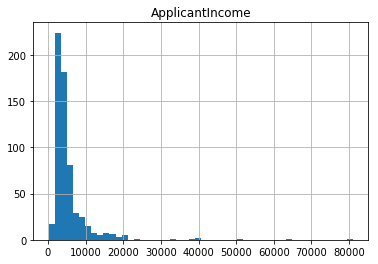

In [10]:
df.hist(column='ApplicantIncome',bins=50)

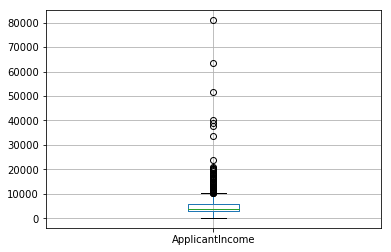

In [11]:
df.boxplot(column='ApplicantIncome')

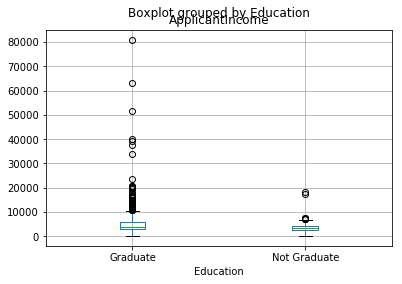

In [12]:
df.boxplot(column='ApplicantIncome', by = 'Education')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6506800B8>]], dtype=object)

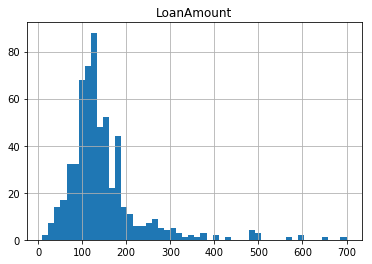

In [13]:
df.hist(column='LoanAmount',bins=50)

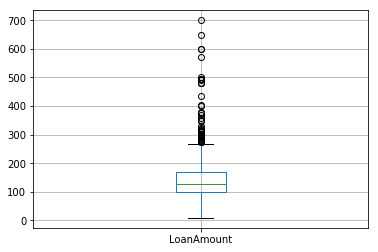

In [14]:
df.boxplot(column='LoanAmount')

In [15]:
temp1 = df['Credit_History'].value_counts(ascending=True)

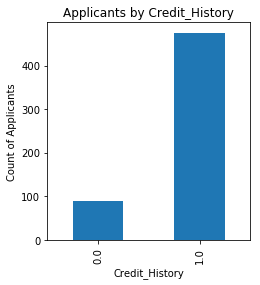

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')
# (or)
# dfTrain.groupby('Pclass').Survived.mean().plot(kind='bar')   //example from elsewhere Pclass and Survived are column names

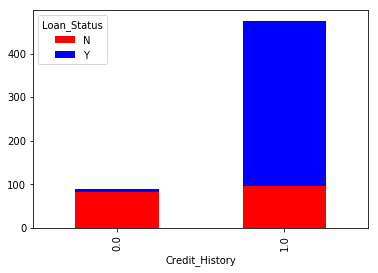

In [17]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [18]:
#2 – Apply Function (to find the missing values row and column-wise apart from the general is.empty findings in describe())
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df2.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print ("\nMissing values per row:")
print (df2.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values per row:
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [19]:
from scipy.stats import mode

In [20]:
df['Gender'].fillna(df['Gender'].mode(), inplace=True)
df['Married'].fillna(df['Married'].mode(), inplace=True)
df['Self_Employed'].fillna((df['Self_Employed'].mode()), inplace=True)

In [21]:
df['Gender'].fillna(df['Gender'].value_counts().index[0],inplace=True)
df['Married'].fillna(df['Married'].value_counts().index[0], inplace=True)
df['Self_Employed'].fillna((df['Self_Employed'].value_counts().index[0]), inplace=True)
df['Dependents'].fillna(df['Dependents'].value_counts().index[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].value_counts().index[0], inplace=True)# all  perform same function as mode()

In [22]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)


In [23]:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:

Missing values per column:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [25]:
#crosstab:
#This can be tested using cross-tabulation as shown below:
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True)

def percConvert(ser):
  return ser/float(ser[-1])
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True).apply(percConvert, axis=1) #convert into percnetage ratios

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.209524,0.790476,1.0
All,0.312704,0.687296,1.0


In [26]:
#crosstab in %
def percConvert(ser):
  return ser/float(ser[-1])
pd.crosstab(df["Credit_History"],df["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.209524,0.790476,1.0
All,0.312704,0.687296,1.0


In [28]:
#Sorting
df_sorted = df.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
df_sorted[['ApplicantIncome','CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
409,81000,0.0
333,63337,0.0
171,51763,0.0
155,39999,0.0
185,39147,4750.0
443,37719,0.0
183,33846,0.0
126,23803,0.0
506,20833,6667.0
284,20667,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D652433BA8>]], dtype=object)

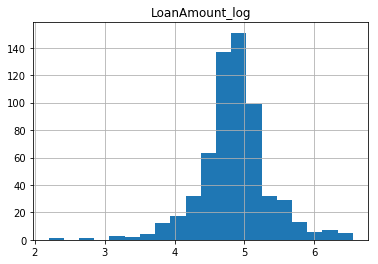

In [29]:
# Feature Engineering [data reduction,data manipulation to get a more useful metric]

#Feature engineering as consisting of two key components.
#The first component is the creation and derivation of fields/variables from raw data [http://www.predictiveanalyticsworld.com/patimes/feature-engineering-within-the-predictive-analytics-process-part-one/7657/]
#Second component is a filtering-out process that identifies the set of variables to be considered within a predictive analytics solution. [http://www.predictiveanalyticsworld.com/patimes/feature-engineering-within-the-predictive-analytics-process-part-2/7771/]

#https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

#TREATING EXTREME VALUES [refer ISEN 613 ppt 10] (box plot and then eliminate outliers is a method if the data is actually an outlier unlike here)
#Let’s analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply
 #  for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation 
 #  to nullify their effect:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df.hist(column='LoanAmount_log',bins=20)
#Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

#PS:analyse the variales effect on the target variables by testing one at a time and more than one at a time to  get a complete picture

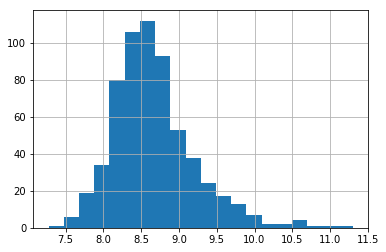

In [30]:
# Feature Engineering
# (1) log transformation applied to remove the skew of the original data to make it normal to apply statistical analysis which 
#heavily rely onthe normality assumption. 
# (2) Using the log transformation "can" reduce variability of data
# skew is calculated as "df.skew()" here. If the transformed data has more skew than the original data, transformation is useless
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

In [31]:
#SCIKIT-LEARN(REGRESN./CLASSIFICN./CLUSTERING/DIMENSIONALITY REDN.)

from sklearn import datasets

from sklearn import metrics

from sklearn import linear_model

dataset = datasets.load_iris()
logreg = linear_model.LogisticRegression()


In [32]:
#SCIKIT-LEARN
print(dataset)

{'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
 

In [33]:
#SCIKIT-LEARN
logreg.fit(dataset.data, dataset.target) #data is the first 4 cols. with length and width, target has types of species (0/1/2)

expected = dataset.target

predicted = logreg.predict(dataset.data)

In [34]:
#SCIKIT-LEARN
print(metrics.classification_report(expected, predicted))

print(metrics.confusion_matrix(expected, predicted))

 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


In [35]:
#5. Building a Predictive Model in Python
#Since, sklearn requires all inputs to be numeric, we should convert all our categorical variables into
#numeric by encoding the categories. This can be done using the following code:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
    print( df.dtypes)
# categoricals must be appropriately dealt with ,else they behave like numbers that can be mathematcally manipulated    
#ex: df["grade"] = df["raw_grade"].astype("category")  //forcing into "category" datatype


Loan_ID               object
Gender                 int64
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object
Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object
Loan_ID               object
Gender         

In [36]:
#Import models from scikit learn module:
from sklearn import linear_model
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn import ensemble
from sklearn import tree
from sklearn.tree import  export_graphviz
from sklearn import metrics

C:\Users\Karthik\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
 #LogisticRegression 1/2:
#Generic function for making a classification model and accessing performance:

#def classification_model(model, data, predictors, outcome):
  #Fit the model:
#    model.fit(data[predictors],data[outcome])
      #Make predictions on training set:
  

    
data=df    
model=linear_model.LogisticRegression()
outcome = 'Loan_Status'
predictors = ['Credit_History']

model.fit(data[predictors],data[outcome])

predictions = model.predict(data[predictors])
print(predictions)

                #//Used to print the predictions in a tabular format with index besides it
#dfPrediction = pd.DataFrame(data=prediction,index = dfTest.index.values,columns=['Survived']) 
#contentTestPredObject1 = dfPrediction.to_csv()   
                    
    
    
    #Print accuracy
accuracy = metrics.accuracy_score(predictions,data[outcome])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

#[Check next block for cross validation ONLY]

#K_Fold Cross-Validation , http://www.dummies.com/programming/big-data/data-science/data-science-cross-validating-in-python/
kf = KFold(data.shape[0], n_folds=5)
error = []
for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(   model.score (data[predictors].iloc[test], data[outcome].iloc[test])  )
 
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 

In [38]:
#K_Fold Cross-Validation , http://www.dummies.com/programming/big-data/data-science/data-science-cross-validating-in-python/
kf = KFold(data.shape[0], n_folds=5)
error = []
for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(   model.score (data[predictors].iloc[test], data[outcome].iloc[test])  )
 
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

Cross-Validation Score : 80.946%


In [39]:
#clarification in above K-Fold
df.shape[0]


614

In [40]:
#clarification in above K-Fold
help(KFold)


Help on class KFold in module sklearn.cross_validation:

class KFold(_BaseKFold)
 |  K-Folds cross validation iterator.
 |  
 |  .. deprecated:: 0.18
 |      This module will be removed in 0.20.
 |      Use :class:`sklearn.model_selection.KFold` instead.
 |  
 |  Provides train/test indices to split data in train test sets. Split
 |  dataset into k consecutive folds (without shuffling by default).
 |  
 |  Each fold is then used as a validation set once while the k - 1 remaining
 |  fold(s) form the training set.
 |  
 |  Read more in the :ref:`User Guide <cross_validation>`.
 |  
 |  Parameters
 |  ----------
 |  n : int
 |      Total number of elements.
 |  
 |  n_folds : int, default=3
 |      Number of folds. Must be at least 2.
 |  
 |  shuffle : boolean, optional
 |      Whether to shuffle the data before splitting into batches.
 |  
 |  random_state : None, int or RandomState
 |      When shuffle=True, pseudo-random number generator state used for
 |      shuffling. If None, use

In [41]:
#clarification in above K-Fold
data[outcome].iloc[train] #492=614-(614/n_fold); n_fold=5

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
462    1
463    1
464    0
465    1
466    0
467    1
468    1
469    0
470    1
471    0
472    1
473    1
474    1
475    1
476    1
477    0
478    1
479    0
480    1
481    1
482    1
483    1
484    1
485    1
486    0
487    0
488    1
489    0
490    1
491    1
Name: Loan_Status, Length: 492, dtype: int64

In [42]:

#clarification in above K-Fold
data[predictors].iloc[train]


,Credit_History
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,0.0
8,1.0
9,1.0


In [43]:
#LogisticRegression 2/2:
#Generic function for making a classification model and accessing performance:

#classification_model(model,df,predictor_var,outcome_var)
#def classification_model(model, data, predictors, outcome):
  #Fit the model:
#    model.fit(data[predictors],data[outcome])
      #Make predictions on training set:
  
 
data=df
model=linear_model.LogisticRegression()
outcome = 'Loan_Status'
predictors = ['Credit_History','Education','Married','Self_Employed','Property_Area']
model.fit(data[predictors],data[outcome])

predictions = model.predict(data[predictors])
  #Print accuracy
accuracy = metrics.accuracy_score(predictions,data[outcome])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

#K_Fold Cross-Validation , http://www.dummies.com/programming/big-data/data-science/data-science-cross-validating-in-python/
kf = KFold(data.shape[0], n_folds=5)
error = []
for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(   model.score (data[predictors].iloc[test], data[outcome].iloc[test])  )
 
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [44]:
#Decision Tree Classifier 1/2:
data=df
model = tree.DecisionTreeClassifier() #only change from above block of code
outcome = 'Loan_Status'
predictors = ['Credit_History','Gender','Married','Education']
model.fit(data[predictors],data[outcome])

predictions = model.predict(data[predictors])
  #Print accuracy
accuracy = metrics.accuracy_score(predictions,data[outcome])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))


#K_Fold Cross-Validation , http://www.dummies.com/programming/big-data/data-science/data-science-cross-validating-in-python/
kf = KFold(data.shape[0], n_folds=5)
error = []
for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(   model.score (data[predictors].iloc[test], data[outcome].iloc[test])  )
 
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [45]:
#Decision Tree Classifier 2/2:
data=df
model = tree.DecisionTreeClassifier() #only change from above block of code
outcome = 'Loan_Status'
predictors = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
model.fit(data[predictors],data[outcome])

predictions = model.predict(data[predictors])
  #Print accuracy
accuracy = metrics.accuracy_score(predictions,data[outcome])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

#K_Fold Cross-Validation , http://www.dummies.com/programming/big-data/data-science/data-science-cross-validating-in-python/
kf = KFold(data.shape[0], n_folds=5)
error = []
for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(   model.score (data[predictors].iloc[test], data[outcome].iloc[test])  )
 
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))


Accuracy : 89.414%
Cross-Validation Score : 68.071%


In [46]:
#Random Forest 1/2:
data=df
model = ensemble.RandomForestClassifier(n_estimators=100) #only change from above block of code
outcome = 'Loan_Status'
predictors = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
model.fit(data[predictors],data[outcome])

predictions = model.predict(data[predictors])
  #Print accuracy
accuracy = metrics.accuracy_score(predictions,data[outcome])
print("Accuracy : %s" % "{0:.3%}".format(accuracy))

#K_Fold Cross-Validation , http://www.dummies.com/programming/big-data/data-science/data-science-cross-validating-in-python/
kf = KFold(data.shape[0], n_folds=5)
error = []
for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(   model.score (data[predictors].iloc[test], data[outcome].iloc[test])  )
 
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))



Accuracy : 100.000%
Cross-Validation Score : 76.875%


In [47]:
#Random Forest 2/2:
#As the above random forest has 100% accuracy and is hence overfitted:

#1)ranking of the variables is done which is used to select the top few for the model:

featimp = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print(featimp)


#2)Parameters of the Random ForestClassifier is changed:
#Random Forest
data=df
model = ensemble.RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1) #Parameter changed
outcome = 'Loan_Status'
predictors = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area'] #Top 5 selected
model.fit(data[predictors],data[outcome])

predictions = model.predict(data[predictors])
  #Print accuracy
accuracy = metrics.accuracy_score(predictions,data[outcome])
print("\nAccuracy : %s" % "{0:.3%}".format(accuracy))
print(predictions)

#K_Fold Cross-Validation , http://www.dummies.com/programming/big-data/data-science/data-science-cross-validating-in-python/
kf = KFold(data.shape[0], n_folds=5)
error = []
for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(   model.score (data[predictors].iloc[test], data[outcome].iloc[test])  )
 
print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))


Credit_History      0.259575
TotalIncome_log     0.257234
LoanAmount_log      0.229654
Dependents          0.054769
Property_Area       0.054237
Loan_Amount_Term    0.046567
Married             0.027104
Gender              0.024434
Self_Employed       0.023584
Education           0.022843
dtype: float64

Accuracy : 82.736%
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1


In [48]:
#NEW analysis
df2=pd.read_csv("C:/Users/Karthik/Desktop/Coursera/Ex_Files_RStats_EssT/Exercise Files/analytics vidhya/loan prediction/test.csv")

In [49]:
df2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [50]:
df2['LoanAmount'].fillna(df2['LoanAmount'].mean(), inplace=True)
df2['Loan_Amount_Term'].fillna(df2['Loan_Amount_Term'].mean(), inplace=True)
df2['Credit_History'].fillna(df2['Credit_History'].value_counts().index[0], inplace=True)

In [51]:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df2.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column


Missing values per column:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64


In [52]:
df2['Gender'].fillna(df2['Gender'].value_counts().index[0],inplace=True)
df2['Self_Employed'].fillna((df2['Self_Employed'].value_counts().index[0]), inplace=True)
df2['Dependents'].fillna(df2['Dependents'].value_counts().index[0], inplace=True)

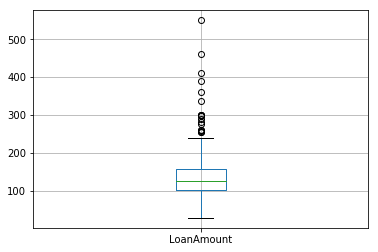

In [53]:
df2.boxplot(column='LoanAmount')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D652D502E8>]], dtype=object)

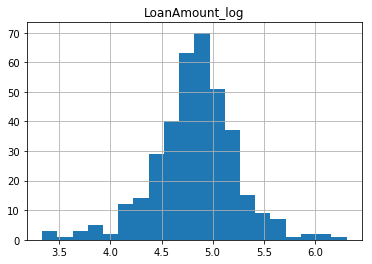

In [54]:
df2['LoanAmount_log'] = np.log(df2['LoanAmount'])
df2.hist(column='LoanAmount_log',bins=20)

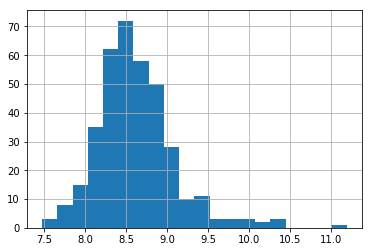

In [55]:
df2['TotalIncome'] = df2['ApplicantIncome'] + df2['CoapplicantIncome']
df2['TotalIncome_log'] = np.log(df2['TotalIncome'])
df2['TotalIncome_log'].hist(bins=20) 

In [56]:
df2['Loan_Status'] = pd.Series(0,index=list(range(613)),dtype='float32') #Series is for 1D, DataFrame is for others
df2.tail()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,Loan_Status
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388,5786,8.663196,0.0
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932,4867,8.490233,0.0
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282,5243,8.564649,0.0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595,7393,8.908289,0.0
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural,4.584967,9200,9.126959,0.0


In [57]:
df2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724,0.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581,0.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678,0.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129,0.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378,0.0
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,5.023881,5587,8.628198,0.0
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,4.077537,2226,7.707962,0.0
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,4.990433,3881,8.263848,0.0
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban,5.634790,13633,9.520249,0.0
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,4.812184,4800,8.476371,0.0


In [58]:
#SCIKIT LEARN
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df2[i] = le.fit_transform(df2[i])
    print( df2.dtypes)

Loan_ID               object
Gender                 int64
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
LoanAmount_log       float64
TotalIncome            int64
TotalIncome_log      float64
Loan_Status          float32
dtype: object
Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
LoanAmount_log       float64
TotalIncome            int64
TotalIncome_log      float64
Loan_Status          float32
dtype: object
Loan_ID               object
Gender         

In [59]:
data=df2    
model=tree.DecisionTreeClassifier()
outcome = 'Loan_Status'
predictors = ['Credit_History','Loan_Amount_Term','LoanAmount_log']

model.fit(df[predictors],df[outcome]) #fit the train data and predict on the test data after cleaning it

predictions = model.predict(data[predictors])
print(predictions)


[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [60]:
df_write=pd.Series(predictions)

In [61]:
df_write.to_csv('C:/Users/Karthik/Desktop/Coursera/Ex_Files_RStats_EssT/Exercise Files/analytics vidhya/loan prediction/prediction_loan.csv')

In [ ]:
#LISTS
#l=[]
#l.append(datanyc[(datanyc['avg_speed_mph']> mean - 2 * sd) & (datanyc['avg_speed_mph']< mean + 2 * sd )].avg_speed_mph)
#np.mean(l) #list needs np as it is a 1 D array